In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Keras
import tensorflow as tf
# import tensorflow.compat.v1 as tf
import tensorflow.keras as kr

tf.compat.v1.enable_eager_execution()

from IPython.core.display import display, HTML

2023-04-18 16:29:49.679322: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Datos Artificiales

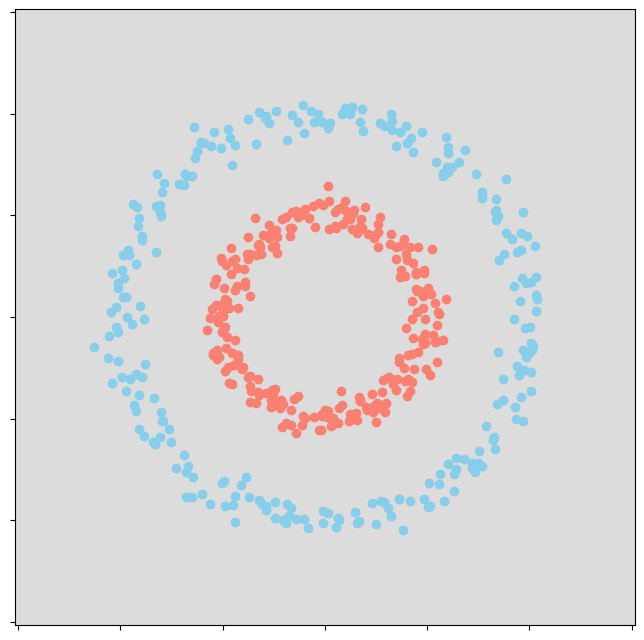

In [4]:
# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

## Keras

In [5]:
# Keras plantea una interfaz sencilla a nivel de capa de todas las funcionalidades que nos aporta tensorflow
# combinamos diferentes tipos de capas para conformar la red neuronal

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


# Creamos el objeto que contendrá a nuestra red neuronal, como secuencia de capas.
# creamos un modelo conformado por una secuencia de capas
model = kr.Sequential()

# las capas full y conneted, donde cada neurona tiene una conexión con la capa anterior son denominadas capas densas
# a las cuales les tenemos que especificar cuantas neuronas contiene y que tipo de función de activación va a ejecutar.
# una vez determinado, la incluimos en nuestro modelo

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

2023-04-18 16:29:52.213063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['acc'])

In [7]:
# Y entrenamos al modelo. Los callbacks
# X: datos de entrada
# Y: datos de salida
# epochs: núm de épocas a entrenar.
model.fit(X, Y, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2435 - acc: 0.5000
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2415 - acc: 0.5100
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2394 - acc: 0.5180
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2373 - acc: 0.5200
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2353 - acc: 0.5480
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2334 - acc: 0.6060
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2313 - acc: 0.6200
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2291 - acc: 0.6580
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2265 - acc: 0.7100
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2239 - acc: 0.7340
Epoch 11/100
16/16 [==============================] - 0s 1m